In [ ]:
%matplotlib inline

In [ ]:
!pip install functorch

     |████████████████████████████████| 21.4 MB 68.4 MB/s 


In [ ]:
import torch
import torch.autograd.forward_ad as fwAD
import functorch as ft

In [ ]:
eta = 0.01
primal = torch.Tensor([0.0, 0.5])
tangent_out = torch.Tensor([0, 0])
tangent = torch.Tensor([0, 0])

xs1 = []
ys1 = []
values1 = []

def beale(theta: torch.Tensor) -> torch.Tensor:
  x = torch.matmul(theta, torch.Tensor([1, 0]))
  y = torch.matmul(theta, torch.Tensor([0, 1]))
  xy = torch.mul(x, y)
  xyy = torch.mul(xy, y)
  xyyy = torch.mul(xyy, y)
  return torch.pow((torch.Tensor([1.5]) - x + xy), 2) + torch.pow((torch.Tensor([2.25]) - x + xyy), 2) + torch.pow((torch.Tensor([2.625]) - x + xyyy), 2)

def rosenbrock(theta: torch.Tensor) -> torch.Tensor:
  x = torch.matmul(theta, torch.Tensor([1, 0]))
  y = torch.matmul(theta, torch.Tensor([0, 1]))
  return torch.pow((torch.Tensor([1]) - x ), 2) + torch.Tensor([100.0]) * torch.pow((y - x * x), 2)


f = beale

for i in range(1000):
  primal = primal - eta * tangent_out * tangent
  xs1.append(float(primal[0]))
  ys1.append(float(primal[1]))
  values1.append(float(f(primal)))
  tangent = torch.normal(mean=torch.Tensor([0, 0]))
  primal_out, tangent_out = ft.jvp(f, (primal,), (tangent,))

In [ ]:
eta = 0.01
primal = torch.Tensor([0.0, 0.5])
tangent_out = torch.Tensor([0, 0])
tangent = torch.Tensor([0, 0])

xs = []
ys = []
values = []

def beale(theta: torch.Tensor) -> torch.Tensor:
  x = torch.matmul(theta, torch.Tensor([1, 0]))
  y = torch.matmul(theta, torch.Tensor([0, 1]))
  xy = torch.mul(x, y)
  xyy = torch.mul(xy, y)
  xyyy = torch.mul(xyy, y)
  return torch.pow((torch.Tensor([1.5]) - x + xy), 2) + torch.pow((torch.Tensor([2.25]) - x + xyy), 2) + torch.pow((torch.Tensor([2.625]) - x + xyyy), 2)

def rosenbrock(theta: torch.Tensor) -> torch.Tensor:
  x = torch.matmul(theta, torch.Tensor([1, 0]))
  y = torch.matmul(theta, torch.Tensor([0, 1]))
  return torch.pow((torch.Tensor([1]) - x ), 2) + torch.Tensor([100.0]) * torch.pow((y - x * x), 2)


f = beale

m = 0
v = 0
beta1 = 0.9
beta2 = 0.999

for i in range(1000):
  if i > 0:
    gradient = tangent_out * tangent
    m = beta1 * m + (1 - beta1) * gradient
    v = beta2 * v + (1 - beta2) * torch.pow(gradient, 2)
    m_hat = m / (1 - beta1 ** i)
    v_hat = v / (1 - beta2 ** i)
    primal = primal - eta * torch.div(m_hat, torch.sqrt(v_hat) + 1e-08)
    xs.append(float(primal[0]))
    ys.append(float(primal[1]))
    values.append(float(f(primal)))
  tangent = torch.normal(mean=torch.Tensor([0, 0]))
  primal_out, tangent_out = ft.jvp(f, (primal,), (tangent,))

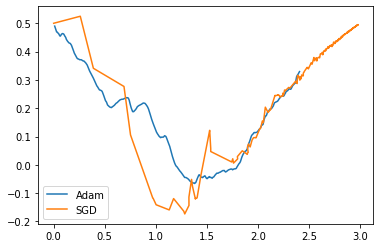

In [ ]:
import matplotlib.pyplot as plt

plt.plot(xs, ys)
plt.plot(xs1, ys1)
plt.legend(["Adam", "SGD"])
#plt.ylim(-0.2, 1.0)

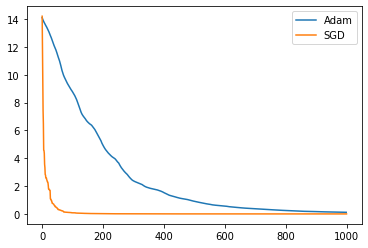

In [ ]:
plt.plot(values)
plt.plot(values1)
plt.legend(["Adam", "SGD"])

adam performs poorly bc we're using a batchsize of one

In [ ]:
model = nn.Linear(5, 5)
input = torch.randn(16, 5)
tangents = tuple([torch.rand_like(p) for p in model.parameters()])

loss = torch.nn.fun

func, params, buffers = ft.make_functional_with_buffers(model)

def func_params_only(params):
    return func(params, buffers, input)

model_output, jvp_out = ft.jvp(func_params_only, (params,), (tangents,))



for i in range(1000):
  primal = primal - eta * tangent_out * tangent
  xs1.append(float(primal[0]))
  ys1.append(float(primal[1]))
  values1.append(float(f(primal)))
  tangent = torch.normal(mean=torch.Tensor([0, 0]))
  primal_out, tangent_out = ft.jvp(f, (primal,), (tangent,))